In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.datasets import mnist

In [3]:
train_data = pd.read_csv("input/train.csv")
test_data = pd.read_csv("input/test.csv")
print(train_data.shape, test_data.shape)

(42000, 785) (28000, 784)


In [4]:
#loading the MNIST dataset
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

#join the training and testing set
x_train1 = np.concatenate((x_test1, x_train1)) 
y_train1 = np.concatenate((y_test1, y_train1))

#Reshaping the array
x_train1 = x_train1.reshape((x_train1.shape[0], 28, 28, 1))
print(x_train1.shape, y_train1.shape)

(70000, 28, 28, 1) (70000,)


In [5]:
#drop the label from dataset
x = np.array(train_data.drop(['label'], axis = 1))

#store the label in y variable
y = np.array(train_data['label'])
test_data = np.array(test_data) #creating a numpy array

#Reshaping the array
x = x.reshape((x.shape[0], 28, 28, 1)) 
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

In [6]:
x = np.concatenate((x, x_train1))
y = np.concatenate((y, y_train1))

In [7]:
#normalizing the pixel values
x = x/255
test_data = test_data/255
y = to_categorical(y, num_classes = 10)

print(x.shape, y.shape)

(112000, 28, 28, 1) (112000, 10)


In [8]:
#Split the array into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, shuffle = True)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(100800, 28, 28, 1) (100800, 10) (11200, 28, 28, 1) (11200, 10)


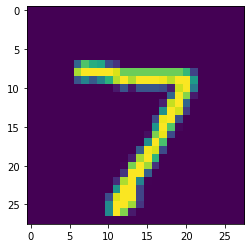

7

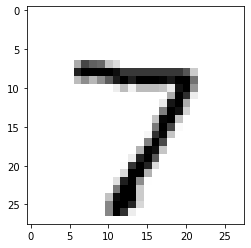

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train1[0])
plt.show()
plt.imshow(x_train1[0],cmap=plt.cm.binary)
y_train1[0]

In [10]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
model.add(MaxPool2D((2,2)))

model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))

model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.30))
model.add(Dense(10, activation = "softmax"))


optimizer = RMSprop(learning_rate = 0.01, rho = 0.9, epsilon = 1e-08, decay = 0.0)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          3

In [11]:
datagen = ImageDataGenerator(rotation_range = 10, zoom_range = 0.1, width_shift_range = 0.1, height_shift_range = 0.1,)

train_batch = datagen.flow(x, y, batch_size = 64)
val_batch = datagen.flow(x_test, y_test, batch_size = 64)

In [12]:
'''Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates.
This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate
is reduced.'''
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 1, factor = 0.1, min_lr = 0.00001)

In [13]:
#Training the model for a fixed number of epochs(iterations on a dataset).
history = model.fit(train_batch,
                              epochs = 20, 
                              steps_per_epoch = len(train_batch),
                              validation_data = val_batch,
                              validation_steps = len(val_batch),
                              verbose = 1,
                             callbacks = [learning_rate_reduction])

Epoch 1/20
1750/1750 [==============================] - 101s 57ms/step - loss: 0.3724 - accuracy: 0.9081 - val_loss: 0.2755 - val_accuracy: 0.9476 - lr: 0.0100
Epoch 2/20
1750/1750 [==============================] - 101s 58ms/step - loss: 0.2381 - accuracy: 0.9560 - val_loss: 0.5323 - val_accuracy: 0.8958 - lr: 0.0100
Epoch 3/20
1750/1750 [==============================] - 101s 58ms/step - loss: 0.2807 - accuracy: 0.9567 - val_loss: 0.1928 - val_accuracy: 0.9708 - lr: 0.0100
Epoch 4/20
1750/1750 [==============================] - 100s 57ms/step - loss: 0.3063 - accuracy: 0.9563 - val_loss: 0.2605 - val_accuracy: 0.9696 - lr: 0.0100
Epoch 5/20
1750/1750 [==============================] - 105s 60ms/step - loss: 0.3276 - accuracy: 0.9550 - val_loss: 0.2518 - val_accuracy: 0.9666 - lr: 0.0100
Epoch 6/20
1750/1750 [==============================] - ETA: 0s - loss: 0.3647 - accuracy: 0.9513
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
1750/1750 [===========

In [14]:
#Finding the loss value & metrics values for the model in test mode.
res = model.evaluate(x, y, batch_size = 1024)
print(res[1]*100)

110/110 [==============================] - 11s 100ms/step - loss: 0.5300 - accuracy: 0.9940
99.39910769462585


In [15]:
model.save("C:\\Users\\adila\\Documents\\handwritten_digit_recognition\\model4\\")

INFO:tensorflow:Assets written to: C:\Users\adila\Documents\handwritten_digit_recognition\model4\assets
